# Understand ROCKET transform

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from datasets import Dataset
from param import * 

from rocket_functions import *
from minirocket_multivariate import *

datalist = ParamDir().data_path_list

In [2]:
dataset = Dataset(datalist[0], 1.0, False)
(X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8)

In [9]:
X_train = X_train.astype("float32")
X_train.shape

(125, 52, 75)

## Intervals From Original Data

Text(0, 0.5, 'position')

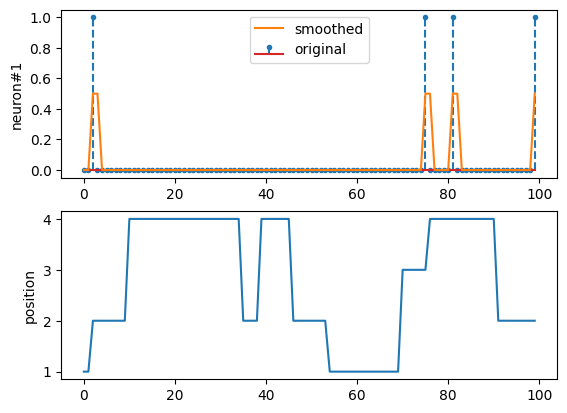

In [6]:
(X, y) , (_, _) = dataset.split_data(dataset.spikes, dataset.coords_xy, .8)
y = dataset._discretize_coords()
X_smooth = dataset._filter_spikes(10, X) 

fig, axes = plt.subplots(nrows=2)
axes[0].stem(range(len(X[:100,0])), X[:100,0], linefmt="--", markerfmt=".", label="original")
axes[0].plot(X_smooth[:100,0], label="smoothed")
axes[0].legend()
axes[0].set_ylabel("neuron#1")

axes[1].plot(y[:100])
axes[1].set_ylabel("position")


## data visualization

Text(0.5, 0.98, 'neurons X time points')

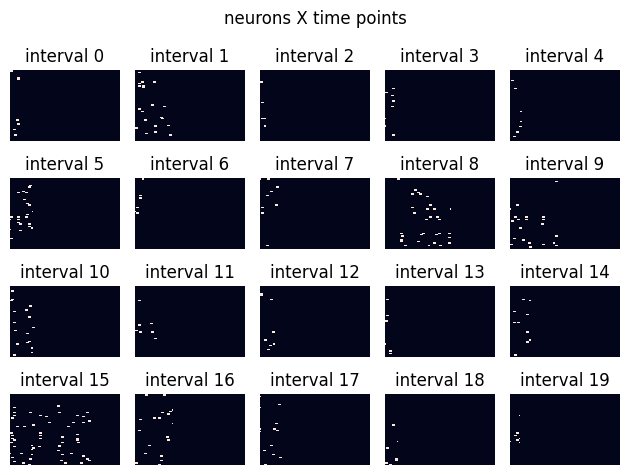

In [29]:
fig, axes = plt.subplots(ncols=5, nrows=4, tight_layout=True)
axes = axes.ravel()
for i, ax in enumerate(axes):
    sns.heatmap(X_train[i, :, :], cbar=False, yticklabels=False, xticklabels=False, ax=ax)
    ax.set_title(f"interval {i}")
plt.suptitle("neurons X time points")

## Transformed X

Text(0.5, 1.0, 'Transformed Input')

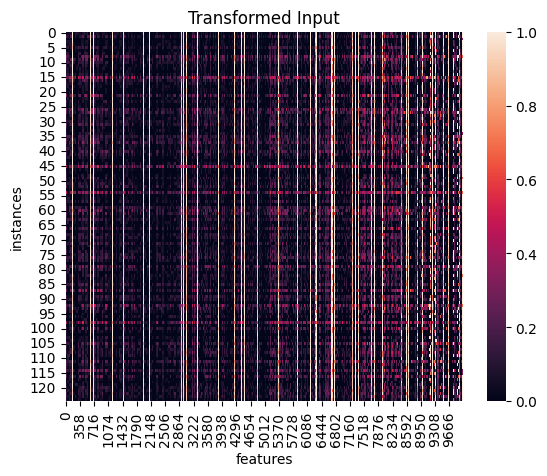

In [35]:
fig, ax = plt.subplots()
sns.heatmap(X_transform, ax=ax)
ax.set_ylabel("instances")
ax.set_xlabel("features")
ax.set_title("Transformed Input")